In [ ]:
#GRÁFICO DE SENSIBILIDADE

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# Função de resposta do pulsar (F_A)
def pulsar_response(theta, phi, pulsar_theta, pulsar_phi, polarization):
    """
    Calcula a resposta do pulsar para uma direção do céu.
    theta, phi: Coordenadas da direção no céu (em radianos).
    pulsar_theta, pulsar_phi: Coordenadas do pulsar (em radianos).
    polarization: "+" ou "x" para escolher a polarização.
    """
    # Vetores unitários para a direção no céu e do pulsar
    sky_dir = np.array([
        np.sin(theta) * np.cos(phi),
        np.sin(theta) * np.sin(phi),
        np.cos(theta)
    ])
    pulsar_dir = np.array([
        np.sin(pulsar_theta) * np.cos(pulsar_phi),
        np.sin(pulsar_theta) * np.sin(pulsar_phi),
        np.cos(pulsar_theta)
    ])

    # Vetores ortogonais para definir a polarização
    m = np.array([np.sin(phi), -np.cos(phi), 0])  # Vetor "m"
    n = np.array([
        np.cos(theta) * np.cos(phi),
        np.cos(theta) * np.sin(phi),
        -np.sin(theta)
    ])

    # Tensores de polarização
    e_plus = np.outer(m, m) - np.outer(n, n)
    e_cross = np.outer(m, n) + np.outer(n, m)

    # Escolha do tensor de polarização
    e = e_plus if polarization == "+" else e_cross

    # Cálculo de F_A(Ω̂)
    denominator = 1 + np.dot(sky_dir, pulsar_dir)  # Denominador da função de resposta

    # Evitar divisão por zero
    if np.isclose(denominator, 0, atol=1e-10):  # Verifica se o denominador está muito próximo de zero
        F = 0.0  # Define a resposta como zero para evitar erros
    else:
        F = 0.5 * np.dot(pulsar_dir, np.dot(e, pulsar_dir)) / denominator

    return F
    
# Função para calcular ΓΩ
def overlap_reduction_function(ra, dec, pulsar1, pulsar2):
    """
    Calcula a função de sobreposição ΓΩ para dois pulsares.
    ra, dec: Direção no céu (em radianos).
    pulsar1, pulsar2: Coordenadas dos pulsares [(ra, dec), (ra, dec)].
    """
    ra1, dec1 = pulsar1
    ra2, dec2 = pulsar2

    # Respostas dos dois pulsares para ambas as polarizações
    F1_plus = pulsar_response(ra, dec, ra1, dec1, "+")
    F1_cross = pulsar_response(ra, dec, ra1, dec1, "x")
    F2_plus = pulsar_response(ra, dec, ra2, dec2, "+")
    F2_cross = pulsar_response(ra, dec, ra2, dec2, "x")

    # Soma sobre as polarizações
    gamma = (F1_plus * F2_plus + F1_cross * F2_cross) * (3 / (4 * np.pi))
    return gamma

# Criar o skymap G(Ω)
def create_sensitivity_skymap(pulsars, nside=32):
    """
    Cria o skymap de sensibilidade G(Ω) para uma rede de pulsares.
    pulsars: Lista de coordenadas [(ra, dec), (ra, dec), ...] em radianos.
    nside: Resolução do mapa Healpix.
    """
    npix = hp.nside2npix(nside)
    skymap = np.zeros(npix)

    # Coordenadas de cada pixel no skymap
    for i in range(npix):
        theta, phi = hp.pix2ang(nside, i)
        ra = phi
        dec = np.pi / 2 - theta

        # Soma sobre todos os pares de pulsares
        gamma_sum = 0
        for j in range(len(pulsars)):
            for k in range(j + 1, len(pulsars)):
                gamma = overlap_reduction_function(ra, dec, pulsars[j], pulsars[k])
                gamma_sum += gamma**2

        # Sensibilidade G(Ω)
        skymap[i] = np.sqrt(gamma_sum)

    return skymap

# Plotar o skymap
def plot_skymap(skymap, title="Skymap"):
    """
    Plota o skymap usando Healpy.
    skymap: Array com os valores do mapa.
    title: Título do plot.
    """
    hp.mollview(skymap, title=title, coord=['C'], unit="Sensitivity", cmap="viridis")
    hp.graticule()  # Adiciona a grade
    plt.show()

# Coordenadas dos pulsares (em radianos)
pulsars = [
    (1.209774, -0.824455),  # Pulsar 1
    (1.622530, -0.034914),  # Pulsar 2
    (1.872143, -1.195375),  # Pulsar 3
    (2.718670,  0.175000),  # Pulsar 4
    (2.720659, -0.127965),  # Pulsar 5
    (2.816847, -0.787393),  # Pulsar 6
    (4.188385, -0.539057),  # Pulsar 7
    (4.194783, -1.256154),  # Pulsar 8
    (4.370164, -0.216833),  # Pulsar 9
    (4.507240,  0.135724),  # Pulsar 10
    (4.566637, -0.402422),  # Pulsar 11
    (4.572478, -0.887244),  # Pulsar 12
    (4.644629, -0.202192),  # Pulsar 13
    (4.964674,  0.169982),  # Pulsar 14
    (5.004916, -0.658507),  # Pulsar 15
    (5.148285,  0.376310),  # Pulsar 16
    (5.602297, -0.593153),  # Pulsar 17
    (5.615849, -1.000423),  # Pulsar 18
    (5.689759, -0.136963)   # Pulsar 19
]

# Criar o skymap
nside = 16  # Resolução do mapa (mais alto = mais detalhes)
skymap = create_sensitivity_skymap(pulsars, nside=nside)

# Plotar o skymap
plot_skymap(skymap, title="Pulsar Timing Array Sensitivity")

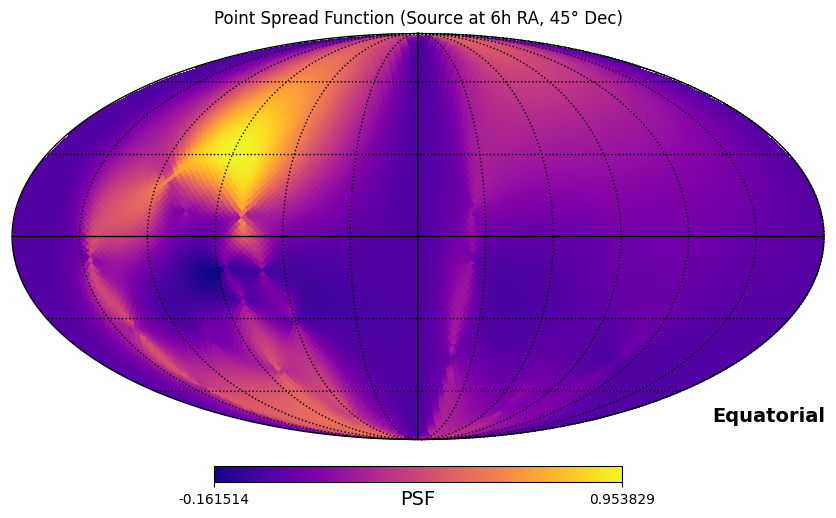

In [3]:
#GRÁFICO DE SPREAD FUNCTION

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# Função de resposta do pulsar (F_A) (do código original)
def pulsar_response(theta, phi, pulsar_theta, pulsar_phi, polarization):
    sky_dir = np.array([
        np.sin(theta) * np.cos(phi),
        np.sin(theta) * np.sin(phi),
        np.cos(theta)
    ])
    pulsar_dir = np.array([
        np.sin(pulsar_theta) * np.cos(pulsar_phi),
        np.sin(pulsar_theta) * np.sin(pulsar_phi),
        np.cos(pulsar_theta)
    ])
    m = np.array([np.sin(phi), -np.cos(phi), 0])  # Vetor "m"
    n = np.array([
        np.cos(theta) * np.cos(phi),
        np.cos(theta) * np.sin(phi),
        -np.sin(theta)
    ])
    e_plus = np.outer(m, m) - np.outer(n, n)
    e_cross = np.outer(m, n) + np.outer(n, m)
    e = e_plus if polarization == "+" else e_cross
    denominator = 1 + np.dot(sky_dir, pulsar_dir)
    if np.isclose(denominator, 0, atol=1e-10):
        F = 0.0
    else:
        F = 0.5 * np.dot(pulsar_dir, np.dot(e, pulsar_dir)) / denominator
    return F

# Função para calcular ΓΩ (do código original)
def overlap_reduction_function(ra, dec, pulsar1, pulsar2):
    ra1, dec1 = pulsar1
    ra2, dec2 = pulsar2
    F1_plus = pulsar_response(ra, dec, ra1, dec1, "+")
    F1_cross = pulsar_response(ra, dec, ra1, dec1, "x")
    F2_plus = pulsar_response(ra, dec, ra2, dec2, "+")
    F2_cross = pulsar_response(ra, dec, ra2, dec2, "x")
    gamma = (F1_plus * F2_plus + F1_cross * F2_cross) * (3 / (4 * np.pi))
    return gamma

# Função para calcular a PSF
def compute_psf(pulsars, source_ra, source_dec, nside=32):
    """
    Calcula a Point Spread Function (PSF) para uma rede de pulsares.
    pulsars: Lista de coordenadas [(ra, dec), (ra, dec), ...] em radianos.
    source_ra, source_dec: Coordenadas da fonte central (em radianos).
    nside: Resolução do mapa Healpix.
    """
    npix = hp.nside2npix(nside)
    psf_map = np.zeros(npix)

    # Coordenadas da fonte central (Ω')
    source_theta = np.pi / 2 - source_dec
    source_phi = source_ra

    # Calcular ΓΩ' para a direção da fonte real
    gamma_source = []
    for j in range(len(pulsars)):
        for k in range(j + 1, len(pulsars)):
            gamma_source.append(
                overlap_reduction_function(source_phi, source_theta, pulsars[j], pulsars[k])
            )
    gamma_source = np.array(gamma_source)
    gamma_source_squared_sum = np.sum(gamma_source**2)

    # Calcular a PSF para cada pixel
    for i in range(npix):
        theta, phi = hp.pix2ang(nside, i)
        ra = phi
        dec = np.pi / 2 - theta

        # Calcular ΓΩ para a direção do pixel
        gamma_pixel = []
        for j in range(len(pulsars)):
            for k in range(j + 1, len(pulsars)):
                gamma_pixel.append(
                    overlap_reduction_function(ra, dec, pulsars[j], pulsars[k])
                )
        gamma_pixel = np.array(gamma_pixel)

        # Numerador: Soma cruzada
        numerator = np.sum(gamma_pixel * gamma_source)

        # Denominador: Normalização
        denominator = np.sqrt(gamma_source_squared_sum)

        # PSF
        psf_map[i] = numerator / denominator if denominator != 0 else 0

    return psf_map

# Plotar a PSF
def plot_psf(psf_map, title="Point Spread Function"):
    """
    Plota a Point Spread Function (PSF) usando Healpy.
    psf_map: Array com os valores da PSF.
    title: Título do plot.
    """
    hp.mollview(psf_map, title=title, coord=['C'], unit="PSF", cmap="plasma")
    hp.graticule()
    plt.show()

# Coordenadas dos pulsares (em radianos) (do código original)
pulsars = [
    (1.209774, -0.824455),  # Pulsar 1
    (1.622530, -0.034914),  # Pulsar 2
    (1.872143, -1.195375),  # Pulsar 3
    (2.718670,  0.175000),  # Pulsar 4
    (2.720659, -0.127965),  # Pulsar 5
    (2.816847, -0.787393),  # Pulsar 6
    (4.188385, -0.539057),  # Pulsar 7
    (4.194783, -1.256154),  # Pulsar 8
    (4.370164, -0.216833),  # Pulsar 9
    (4.507240,  0.135724),  # Pulsar 10
    (4.566637, -0.402422),  # Pulsar 11
    (4.572478, -0.887244),  # Pulsar 12
    (4.644629, -0.202192),  # Pulsar 13
    (4.964674,  0.169982),  # Pulsar 14
    (5.004916, -0.658507),  # Pulsar 15
    (5.148285,  0.376310),  # Pulsar 16
    (5.602297, -0.593153),  # Pulsar 17
    (5.615849, -1.000423),  # Pulsar 18
    (5.689759, -0.136963)   # Pulsar 19
]

# Coordenadas da fonte central (em radianos)
source_ra = 1.5708  # 6h RA
source_dec = np.radians(45)  # 45° Dec

# Criar o mapa da PSF
nside = 32  # Resolução do mapa
psf_map = compute_psf(pulsars, source_ra, source_dec, nside=nside)

# Plotar o mapa da PSF
plot_psf(psf_map, title="Point Spread Function (Source at 6h RA, 45° Dec)")